# Chicago Taxi Trips in Year 2022
#### Copyright © 2024 Danny Ng

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%config InlineBackend.figure_format='retina'

# Step 1: Read the data

In [2]:
df = pd.read_csv('chicago_taxi_trip_sample.csv')

In [3]:
df.shape

(100000, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   trip_id       100000 non-null  object 
 1   taxi_id       100000 non-null  object 
 2   month         100000 non-null  int64  
 3   day_of_week   100000 non-null  int64  
 4   hour          100000 non-null  int64  
 5   pickup_area   100000 non-null  object 
 6   dropoff_area  100000 non-null  object 
 7   trip_miles    100000 non-null  float64
 8   trip_seconds  100000 non-null  int64  
 9   fare          100000 non-null  float64
 10  tips          100000 non-null  float64
 11  tips_percent  100000 non-null  float64
 12  tolls         100000 non-null  float64
 13  extras        100000 non-null  float64
 14  trip_total    100000 non-null  float64
 15  payment_type  100000 non-null  object 
 16  company       100000 non-null  object 
dtypes: float64(7), int64(4), object(6)
memory usage: 

In [5]:
df.head(2)

trip_id taxi_id  month  day_of_week  hour pickup_area dropoff_area  \
0  259f9c40ef9  f9bc93      1            5     0       Other        Other   
1  0f61207c6d8  271cde      1            5     0    Downtown        Other   

   trip_miles  trip_seconds  fare  tips  tips_percent  tolls  extras  \
0        0.35           151  4.25   0.0           0.0    0.0     1.0   
1        0.53           918  8.50   0.0           0.0    0.0     0.0   

   trip_total payment_type       company  
0        5.25         Cash  City Service  
1        8.50         Cash      Sun Taxi

In [6]:
df.tail(2)

trip_id taxi_id  month  day_of_week  hour pickup_area dropoff_area  \
99998  ed987453c4c  a48535     12            5    23    Downtown        Other   
99999  6f2cde448af  361804     12            5    23       Other        Other   

       trip_miles  trip_seconds  fare  tips  tips_percent  tolls  extras  \
99998        4.09           804  14.0   0.0           0.0    0.0     1.0   
99999       13.10          1080  33.0   0.0           0.0    0.0     0.0   

       trip_total payment_type                    company  
99998        15.0         Cash               City Service  
99999        33.0        Other  Taxi Affiliation Services

In [7]:
df.describe().transpose().astype({'count': int}) # Only numerical columns

count         mean         std   min    25%      50%      75%  \
month         100000     6.936080    3.229650  1.00    4.0    7.000    10.00   
day_of_week   100000     2.882130    1.899382  0.00    1.0    3.000     4.00   
hour          100000    13.862130    5.221752  0.00   10.0   14.000    18.00   
trip_miles    100000     6.121182    6.374934  0.01    1.2    2.900    10.60   
trip_seconds  100000  1156.478920  905.061445  1.00  489.0  869.000  1585.00   
fare          100000    20.141239   14.962318  3.25    8.0   13.250    30.75   
tips          100000     2.511505    3.578416  0.00    0.0    1.000     3.39   
tips_percent  100000     0.133331    0.178893  0.00    0.0    0.062     0.23   
tolls         100000     0.001443    0.075218  0.00    0.0    0.000     0.00   
extras        100000     1.067526    1.897453  0.00    0.0    0.000     1.00   
trip_total    100000    23.883756   18.307585  3.25   10.0   15.900    32.75   

                   max  
month           12.000  
day_of_week      6.000  
hour            23.000  
trip_miles      83.000  
trip_seconds  7197.000  
fare           187.250  
tips            50.000  
tips_percent    11.111  
tolls            7.000  
extras          20.000  
trip_total     187.250

In [8]:
df.describe(include=object).transpose() # Only non-numerical columns

count  unique          top   freq
trip_id       100000  100000  259f9c40ef9      1
taxi_id       100000    2736       8da9e1    175
pickup_area   100000       4     Downtown  48862
dropoff_area  100000       4        Other  47745
payment_type  100000       3  Credit Card  38222
company       100000      28    Flash Cab  21272

# Step 2: Define business problem

#### Business Problem

> The Chicago Department of Transportation is interested in traffic patterns.  In particular, they want to understand how Chicago taxi trip duration is related to other factors of the trip.

#### Task

> Build a linear regression model using historical Chicago taxi trip data from year 2022 with `trip_seconds` as the response variable and other useful information as explanatory variables.

#### Some Considerations

- **Easy or difficulty task?**
    - Intuitively, `trip_miles` or `fare` are likely the most predictive / useful explanatory variable with a strong linear relationship.
    - Does the linear regression model predicts more accurately for some part of the data?
- **Overfitting**
    - If `trip_id` is used as an explanatory variable, then it would surely exhaust the number of degrees of freedom of the model and yield 0 residual error i.e. overfit.
- **Feature engineering**
    - Perform some feature engineering e.g. additional explanatory variables (such as month of year, day of week, hour of day, specific special dates) derived from `trip_start_time`, categorical variables for selected pick-up or drop-off locations, `tips` percentage, indicator variable for presence of `tolls`.
    - Perform variable transformation on some quantitative variables might strengthen the linear relationship (from non-linear).
- **[Multicollinearity](https://en.wikipedia.org/wiki/Multicollinearity)**
    - Some explanatory variables might be highly correlated  e.g. `trip_miles`, `fare` (and etc summation), `trip_total`, distance derived from pick-up vs drop-off locations, or even `payment_type`.  This can affect the explainability of the model.
- **Others**
    - Is (popular) `taxi_id` useful or not?  Any anomaly or interesting behavior for specific taxi cab?
    - Any negative predicted `trip_seconds` value?

# Step 3: Do feature engineering
- See `chicago_taxi_trip_sample.ipynb`

# Step 4: Exploratory data analysis and visualization

In [9]:
# Correlation matrix of numerical variables
numerical_cols = ['trip_seconds', 'trip_miles', 'fare', 'tips', 'tolls', 'extras', 'trip_total', 'tips_percent']
C = df[numerical_cols].corr()

C

trip_seconds  trip_miles      fare      tips     tolls  \
trip_seconds      1.000000    0.731877  0.824167  0.423448  0.019853   
trip_miles        0.731877    1.000000  0.903163  0.508655  0.023787   
fare              0.824167    0.903163  1.000000  0.529455  0.025134   
tips              0.423448    0.508655  0.529455  1.000000  0.019615   
tolls             0.019853    0.023787  0.025134  0.019615  1.000000   
extras            0.426638    0.508376  0.521486  0.491807 -0.002456   
trip_total        0.801559    0.892731  0.976383  0.684750  0.028372   
tips_percent     -0.076842   -0.042703 -0.064983  0.582665  0.002597   

                extras  trip_total  tips_percent  
trip_seconds  0.426638    0.801559     -0.076842  
trip_miles    0.508376    0.892731     -0.042703  
fare          0.521486    0.976383     -0.064983  
tips          0.491807    0.684750      0.582665  
tolls        -0.002456    0.028372      0.002597  
extras        1.000000    0.628575      0.111505  
trip_total    0.628575    1.000000      0.078108  
tips_percent  0.111505    0.078108      1.000000

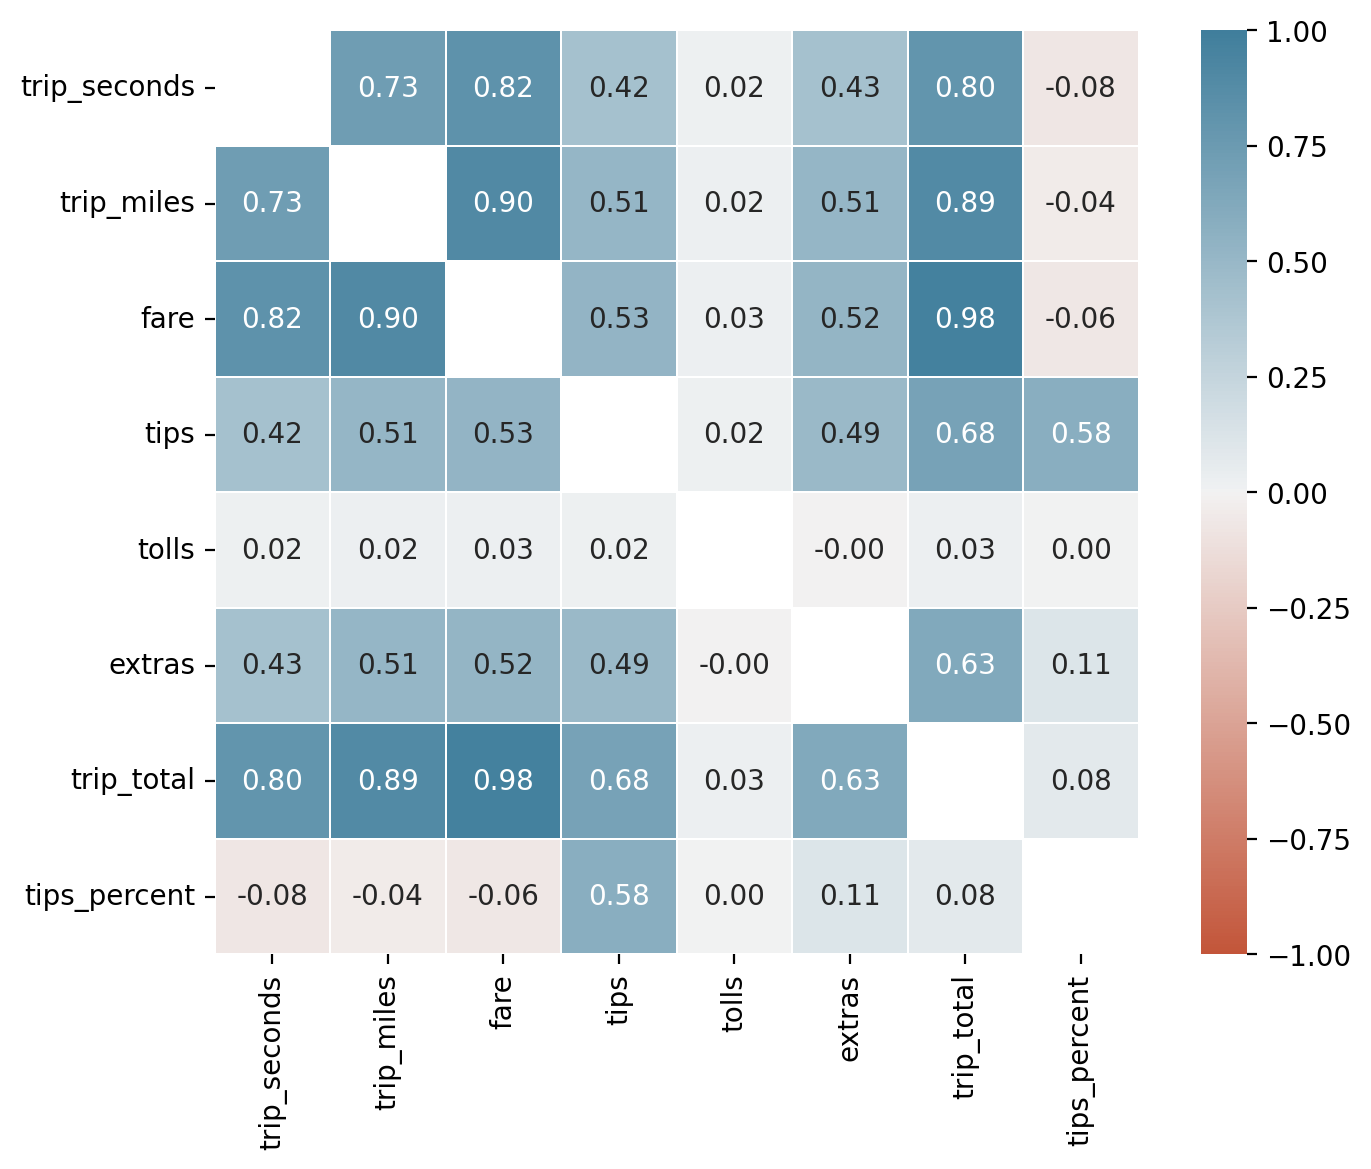

In [10]:
# Visualize correlation matrix as heat map
fig = plt.figure(figsize=(8, 6))
sns.heatmap(C, vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 230, as_cmap=True), annot=True, fmt='.2f',
            linewidths=0.1, square=True, mask=np.identity(len(numerical_cols), dtype=bool), ax=fig.gca());

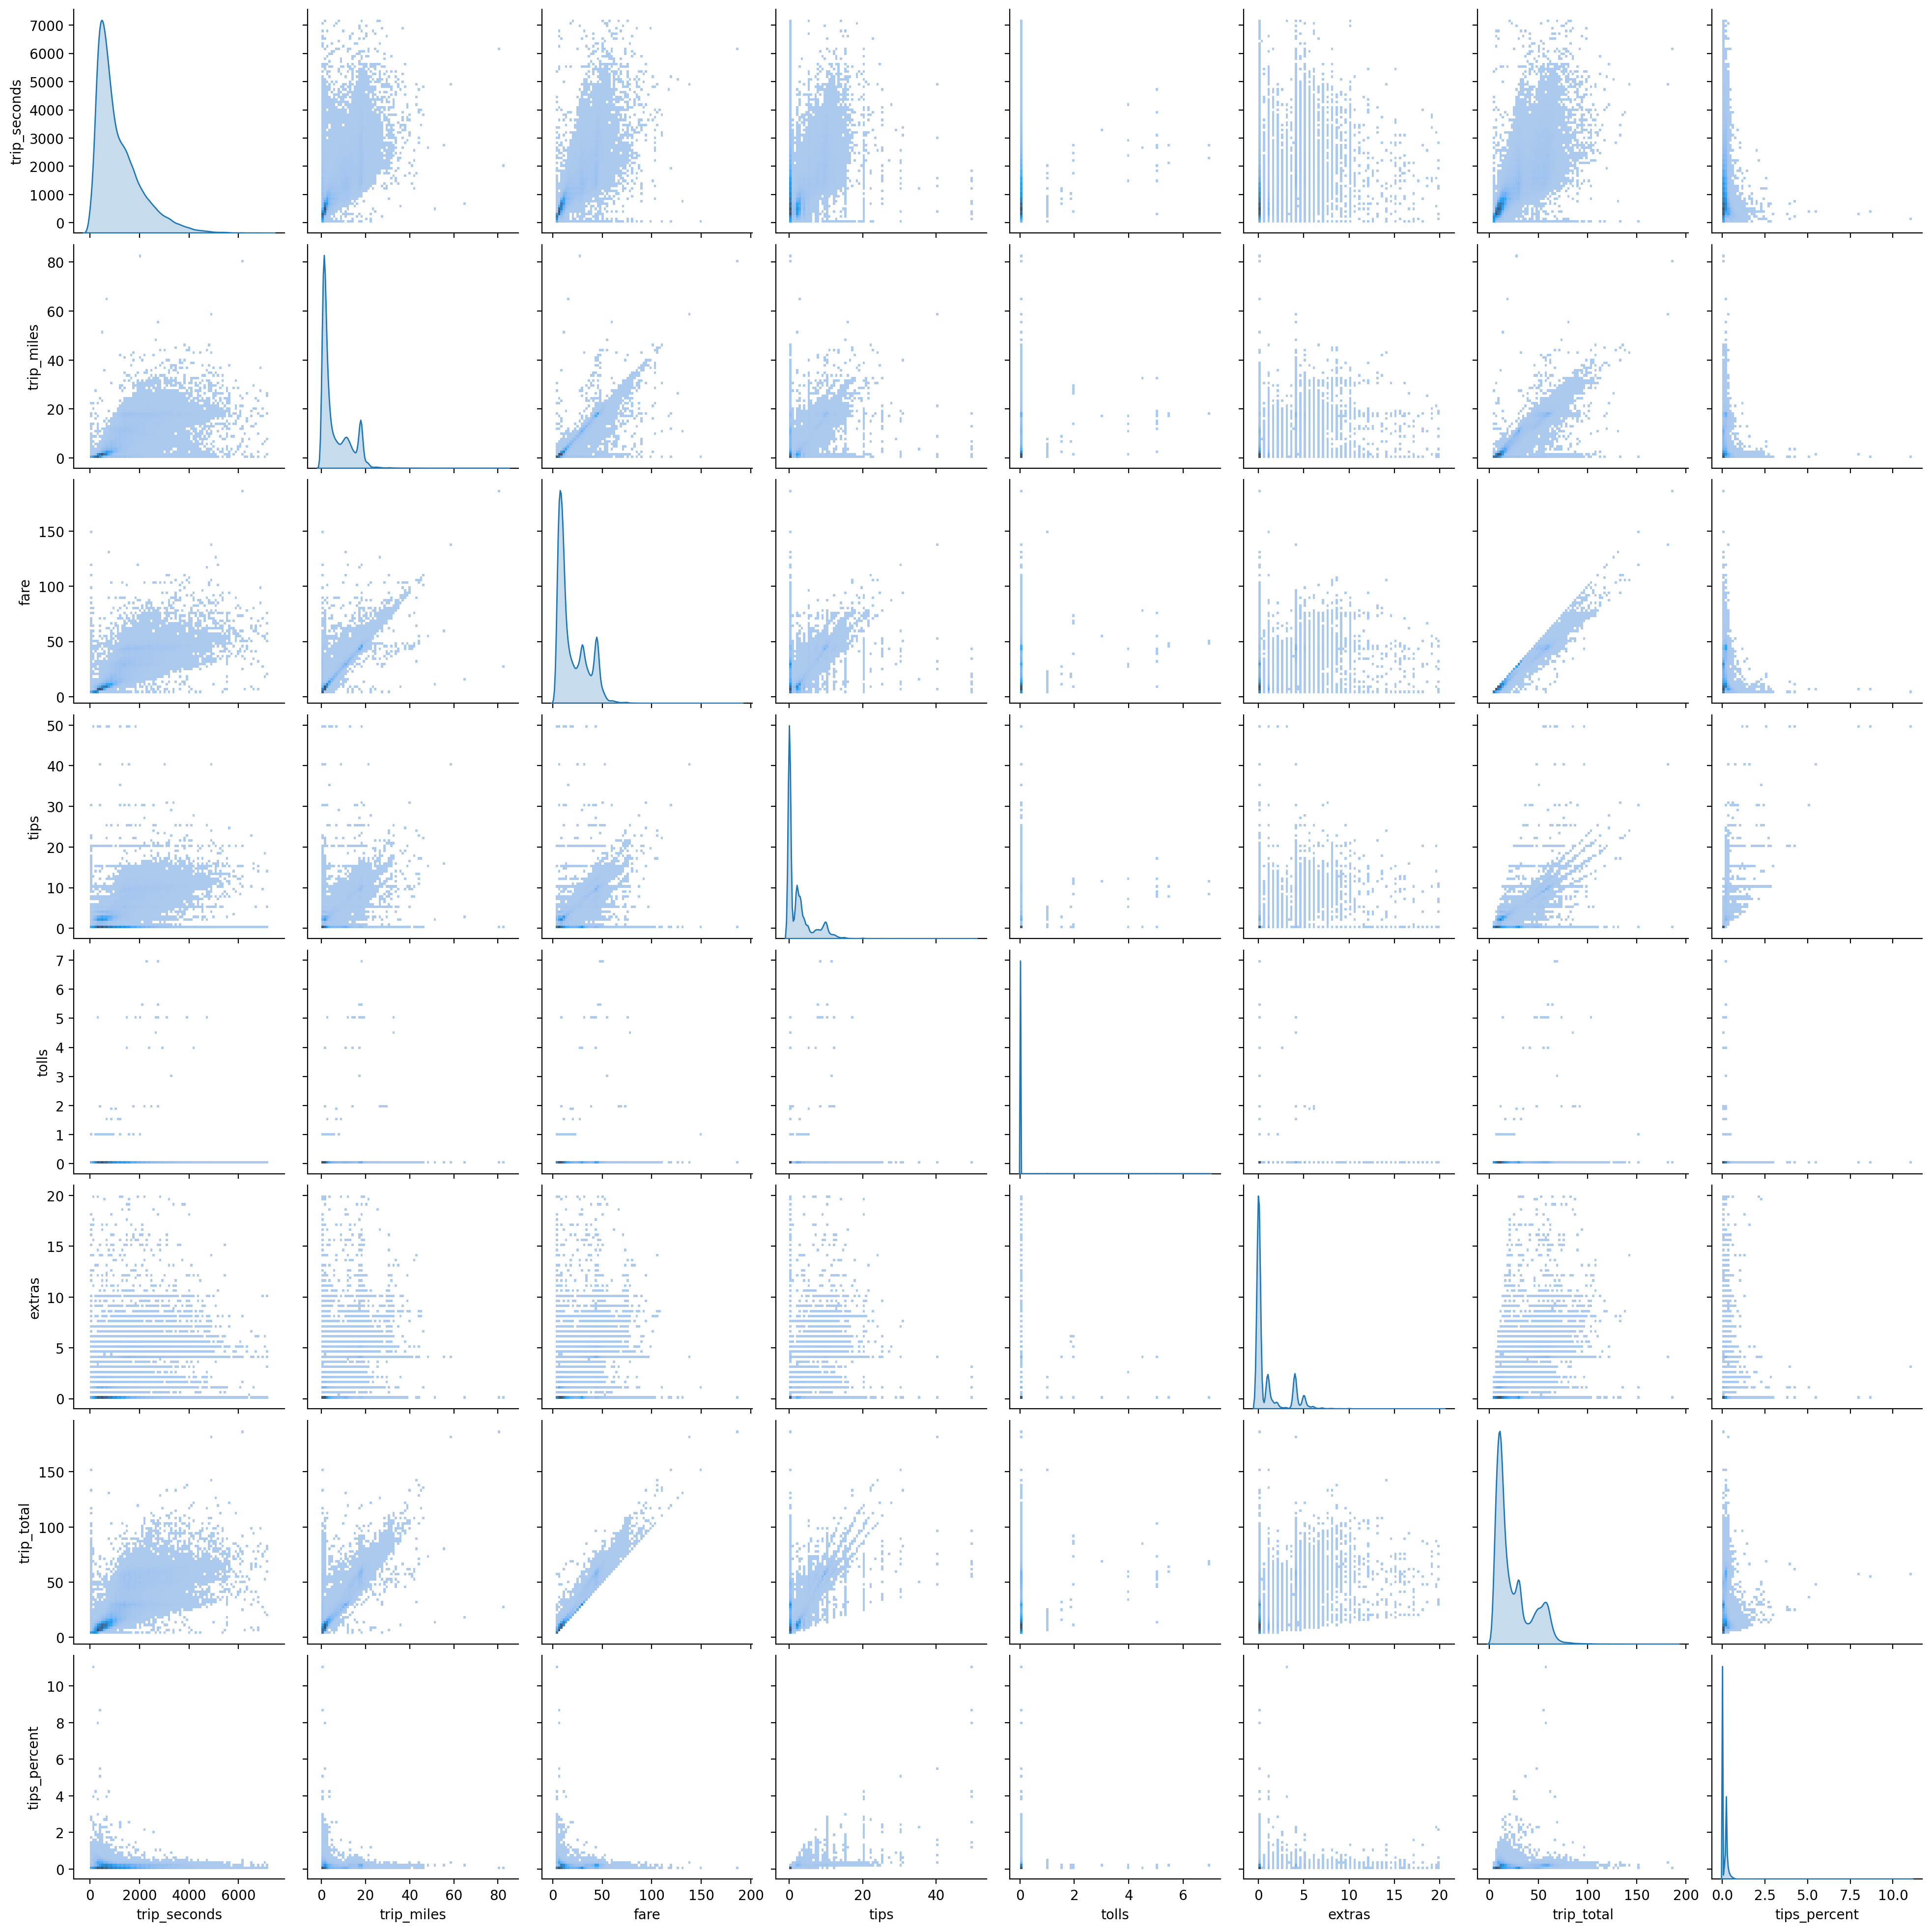

In [11]:
# Pair plot of numerical variables
sns.pairplot(df, vars=numerical_cols, kind='hist', diag_kind='kde', plot_kws={'bins': 80});

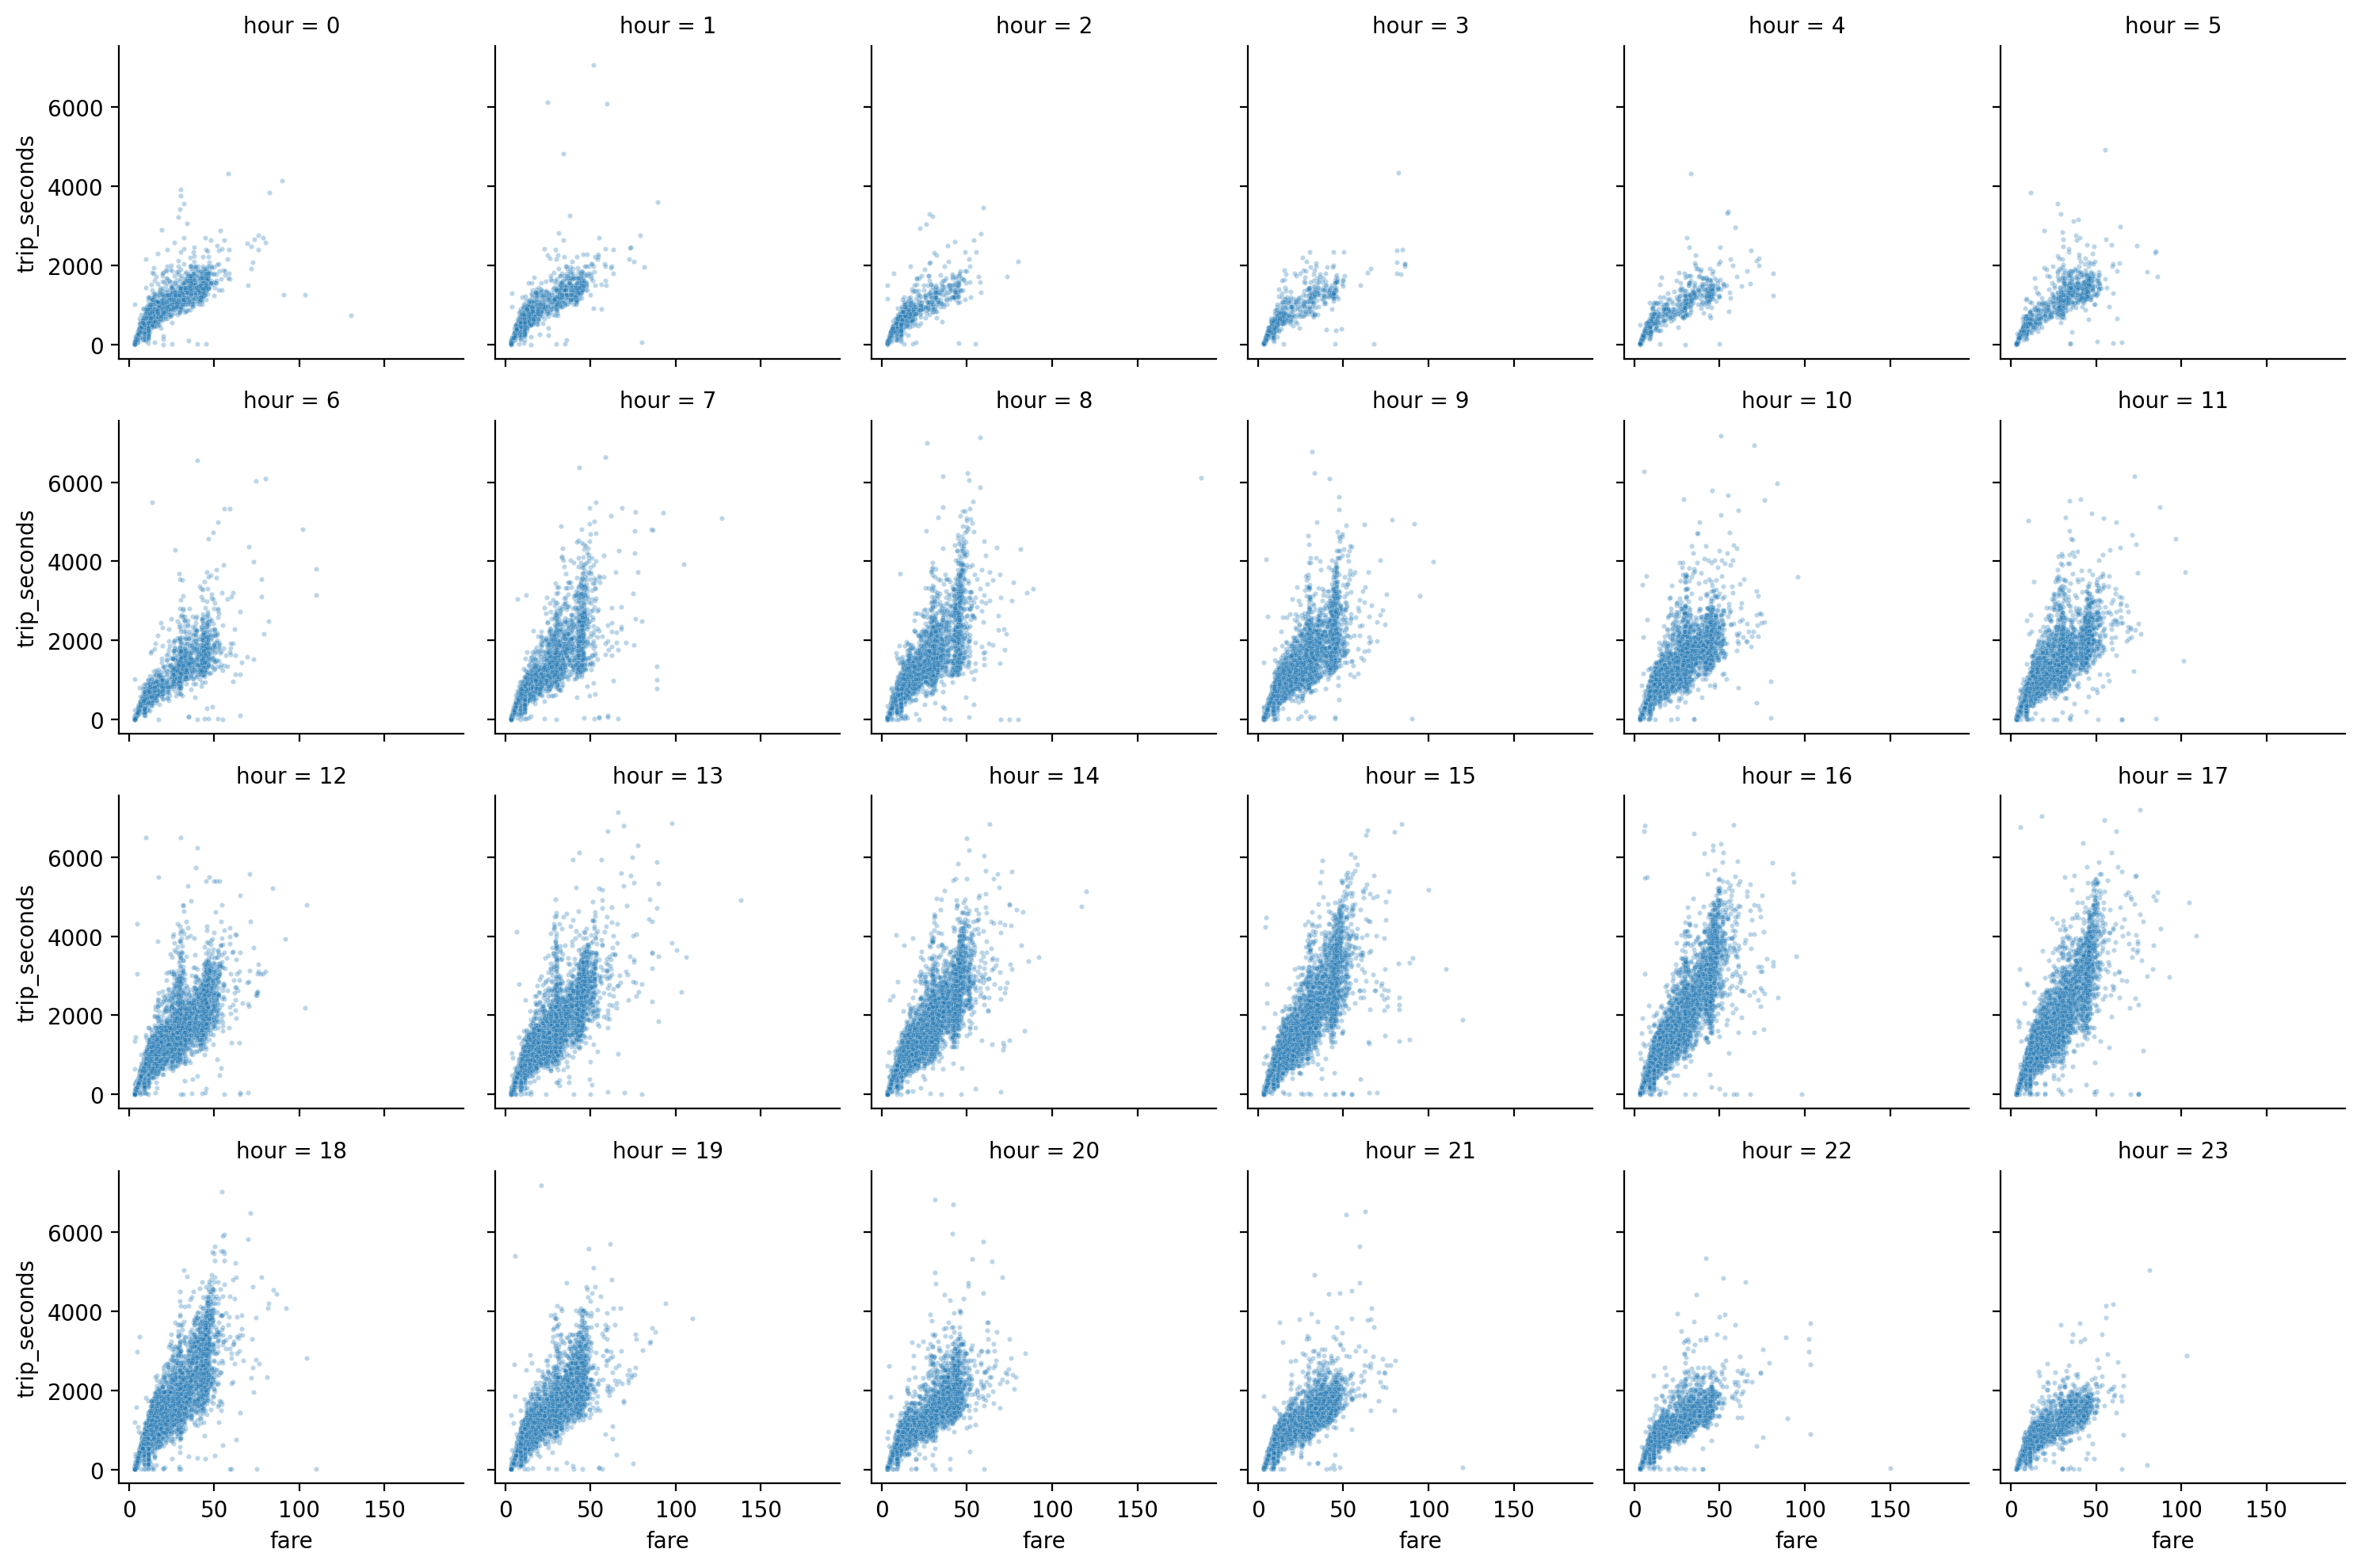

In [12]:
sns.relplot(df, x='fare', y='trip_seconds', col='hour', col_wrap=6, height=2.5, alpha=0.3, s=5);
#Fare vs trip seconds at every hour if we consider hour as a categorical variable. Slicing the data by the col parameter
#Could be possible that a different model fits at some hours of the day, so important to observe

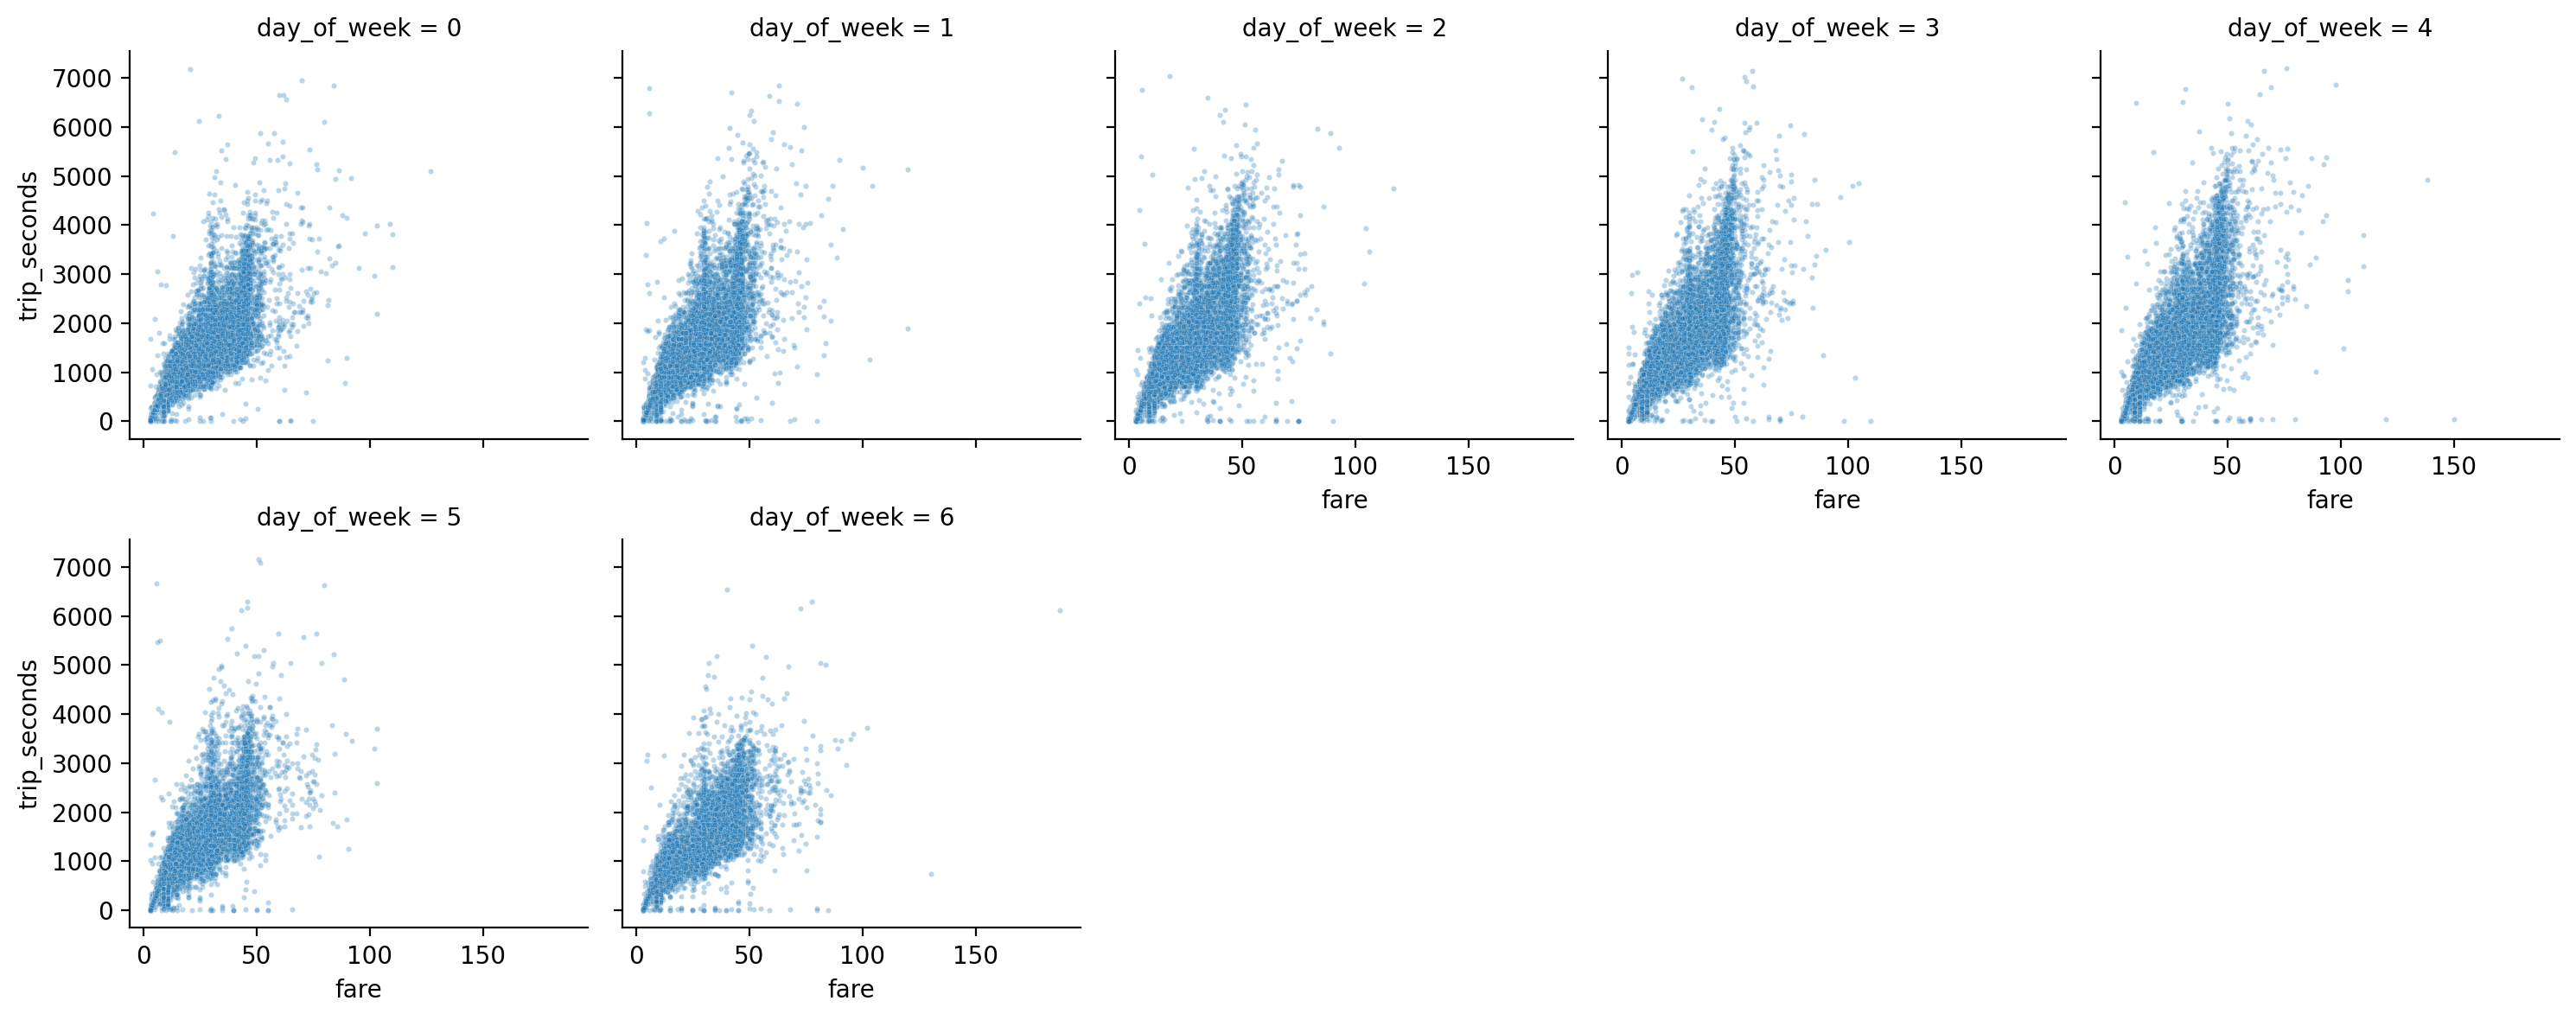

In [13]:
sns.relplot(df, x='fare', y='trip_seconds', col='day_of_week', col_wrap=5, height=3, alpha=0.3, s=5);

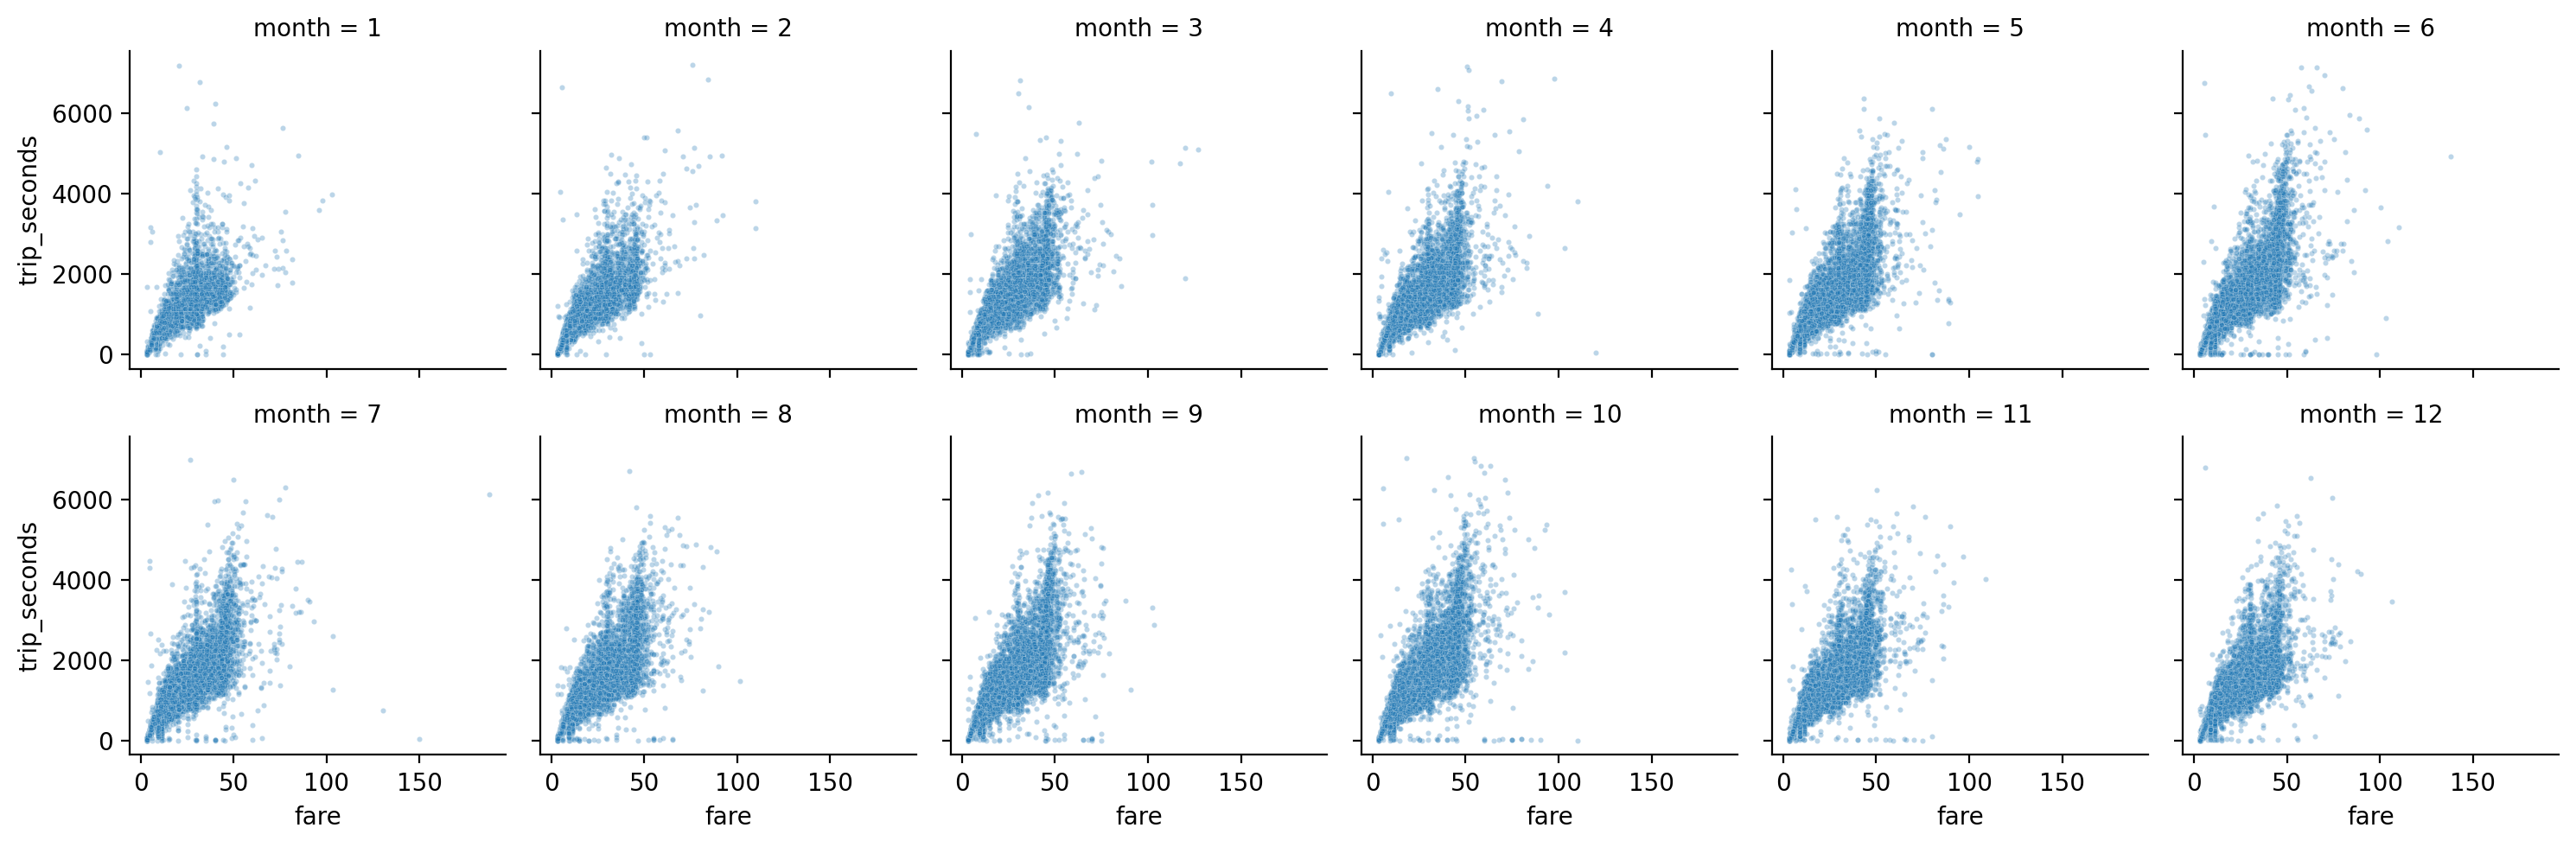

In [14]:
sns.relplot(df, x='fare', y='trip_seconds', col='month', col_wrap=6, height=2.5, alpha=0.3, s=5);

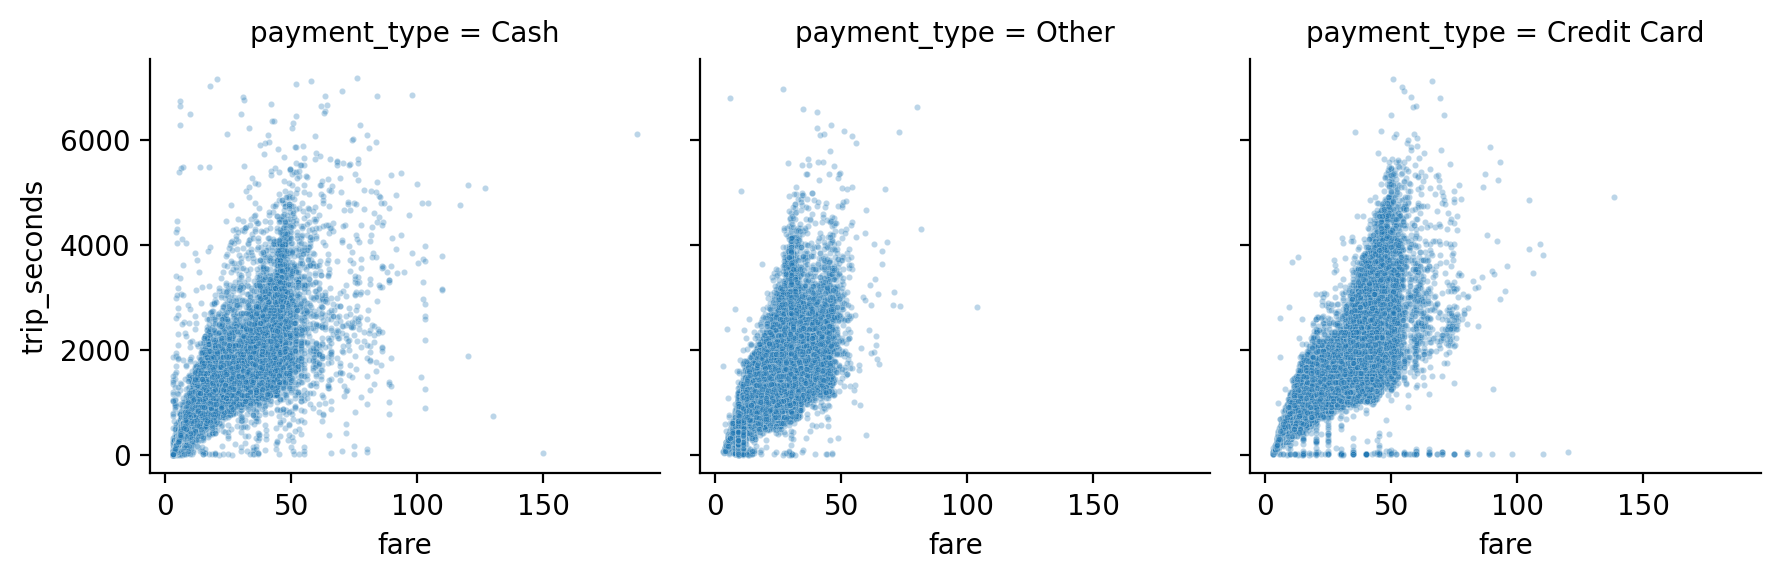

In [15]:
sns.relplot(df, x='fare', y='trip_seconds', col='payment_type', height=3, alpha=0.3, s=5);

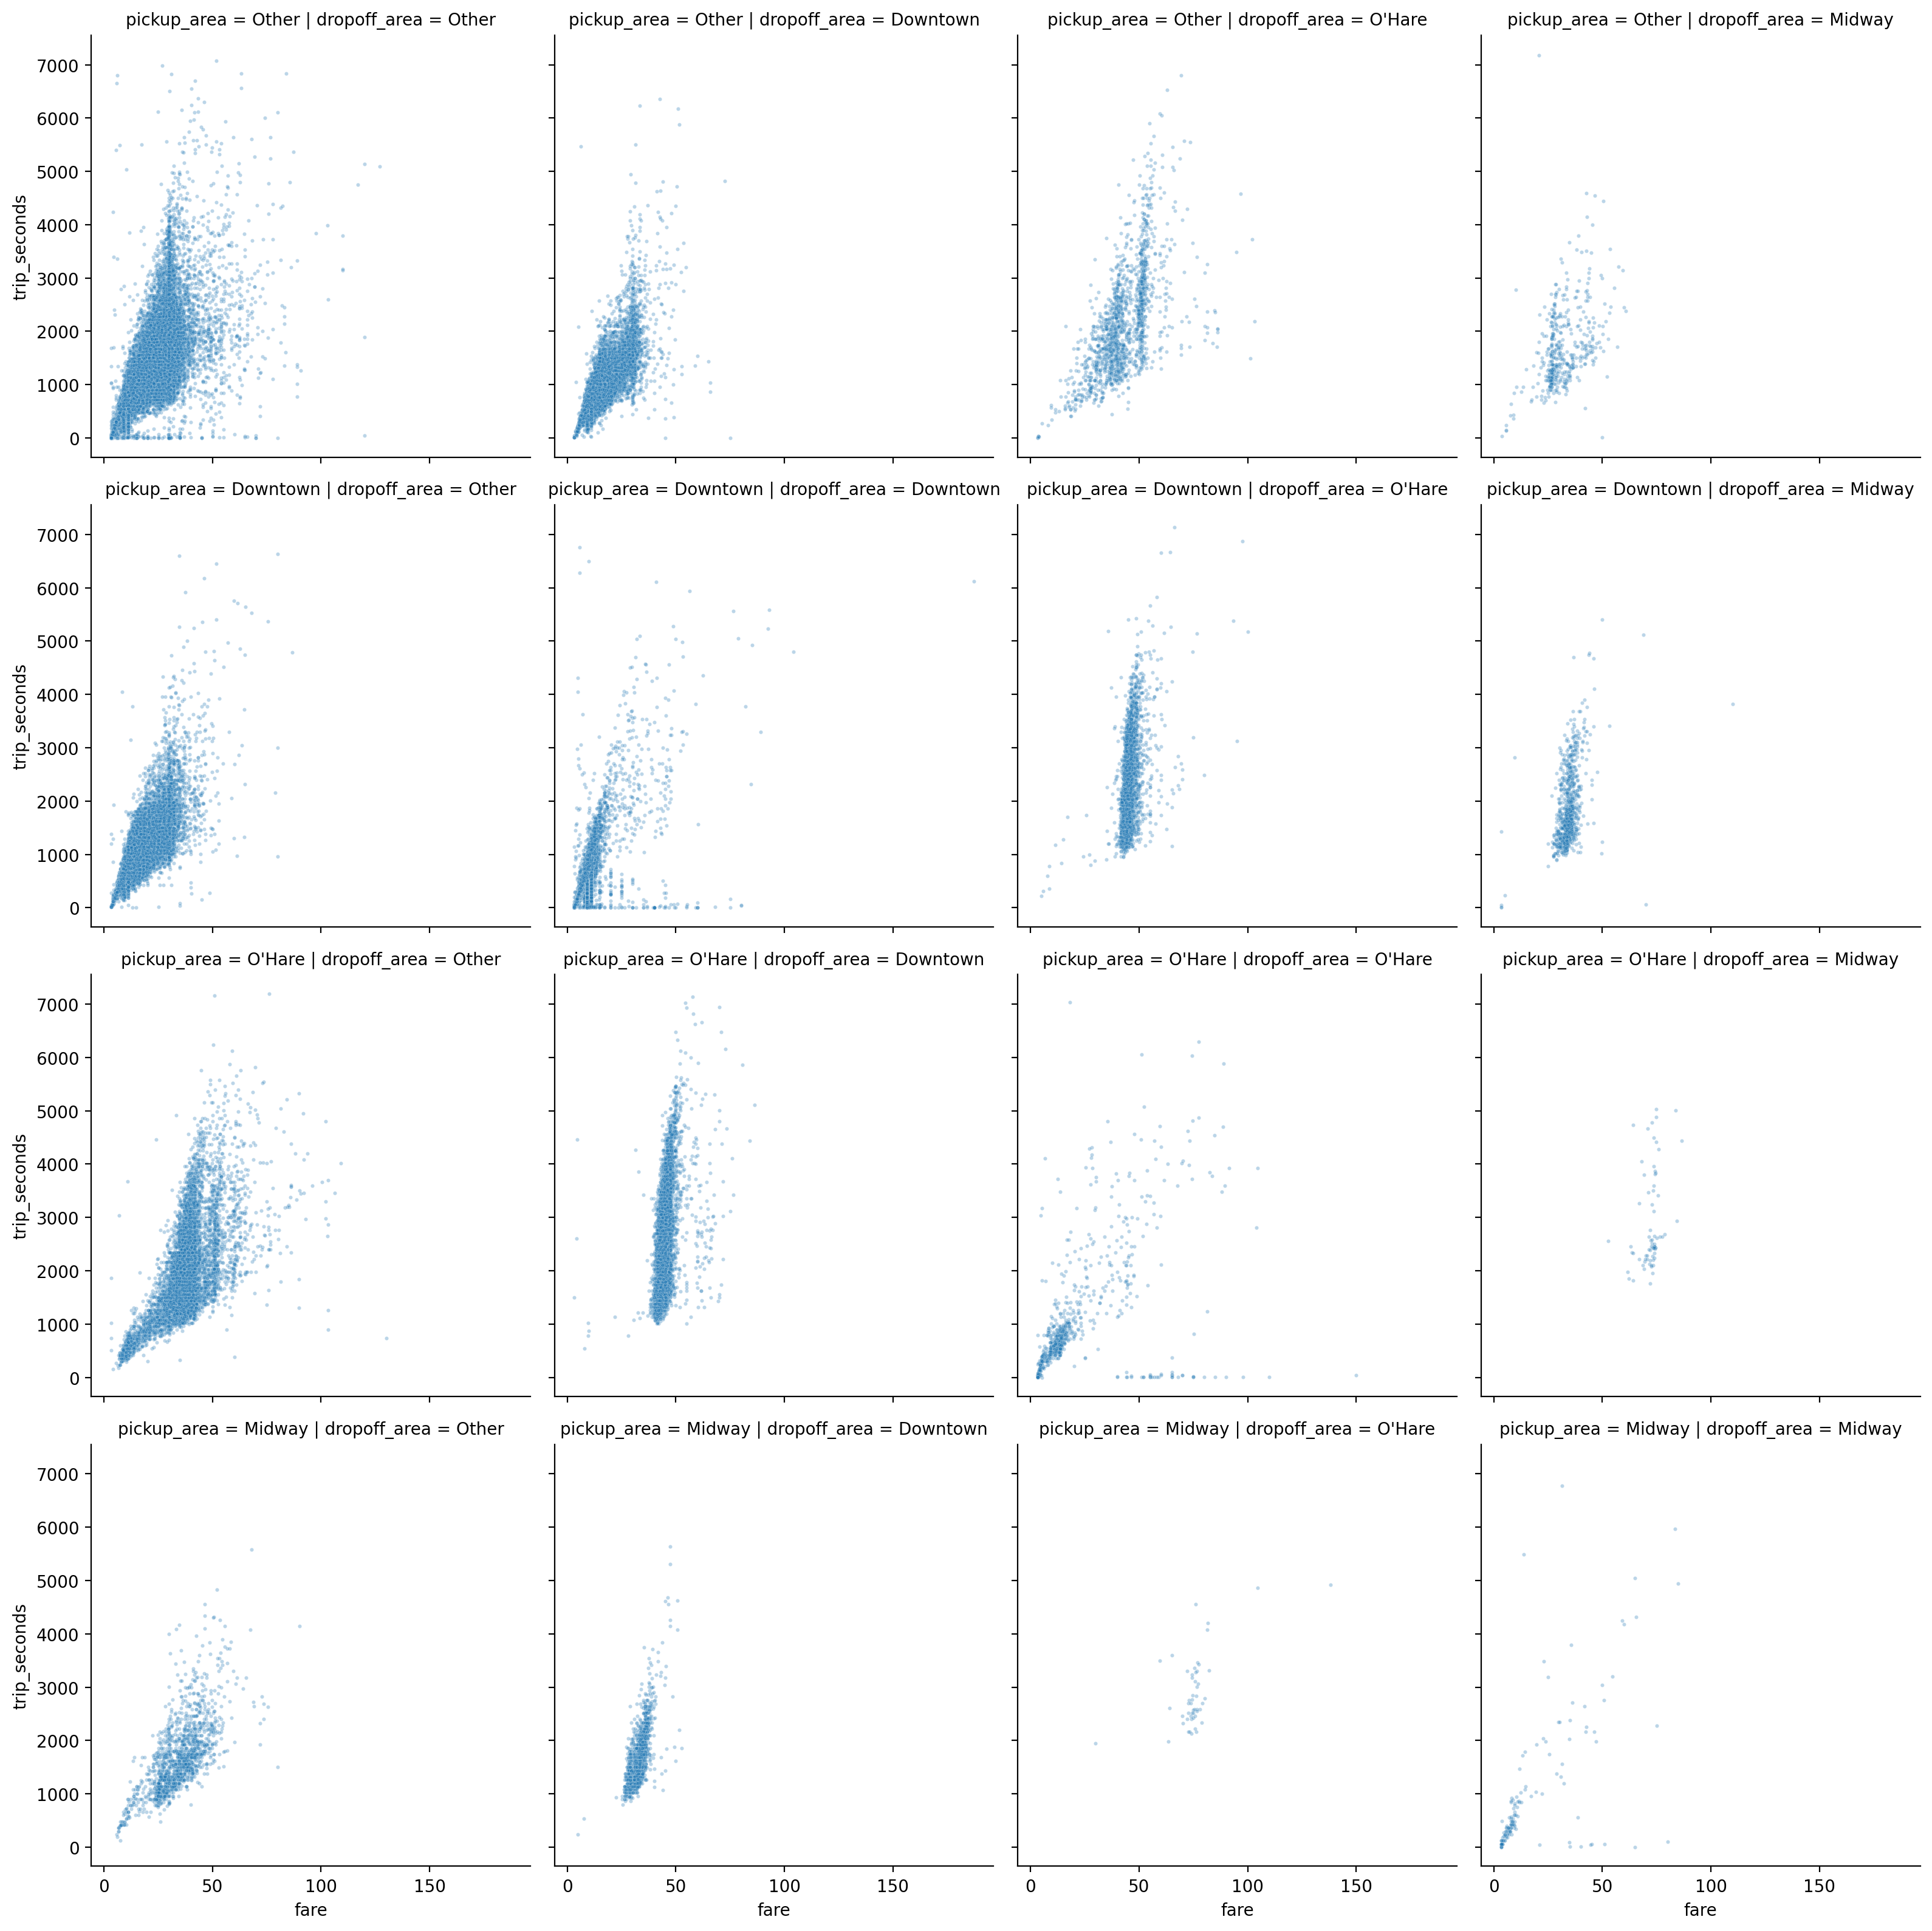

In [16]:
sns.relplot(df, x='fare', y='trip_seconds', row='pickup_area', col='dropoff_area', height=4, alpha=0.3, s=5);

In [17]:
# https://pandas.pydata.org/docs/user_guide/groupby.html
g = df.groupby(['pickup_area', 'dropoff_area'])[['trip_miles', 'trip_seconds', 'fare']]
df2 = pd.concat([g.size().rename('count'), g.mean()], axis=1) # https://pandas.pydata.org/docs/user_guide/advanced.html#advanced-hierarchical
df2['mph'] = df2['trip_miles'] / df2['trip_seconds'] * 3600
df2['$/mile'] = df2['fare'] /  df2['trip_miles']

df2.round(2)

count  trip_miles  trip_seconds   fare    mph  \
pickup_area dropoff_area                                                  
Downtown    Downtown      27193        1.28        498.11   7.72   9.22   
            Midway          905       11.89       1826.88  34.32  23.44   
            O'Hare         3399       16.85       2270.87  45.54  26.71   
            Other         17365        4.28        959.18  15.48  16.05   
Midway      Downtown       1377       10.87       1706.70  33.18  22.93   
            Midway          143        4.25       1012.29  18.12  15.12   
            O'Hare           51       28.16       2900.75  75.46  34.94   
            Other          1451       11.24       1664.48  34.08  24.32   
O'Hare      Downtown       7045       16.43       2438.40  44.89  24.26   
            Midway           72       26.56       2894.18  72.09  33.03   
            O'Hare          787        5.32       1038.42  20.51  18.43   
            Other          6821       13.19       1994.86  37.07  23.79   
Other       Downtown       9380        4.13        967.05  15.40  15.39   
            Midway          439       10.47       1694.26  31.92  22.25   
            O'Hare         1464       15.23       2195.36  43.00  24.97   
            Other         22108        5.62       1184.04  19.73  17.10   

                          $/mile  
pickup_area dropoff_area          
Downtown    Downtown        6.05  
            Midway          2.89  
            O'Hare          2.70  
            Other           3.62  
Midway      Downtown        3.05  
            Midway          4.26  
            O'Hare          2.68  
            Other           3.03  
O'Hare      Downtown        2.73  
            Midway          2.71  
            O'Hare          3.86  
            Other           2.81  
Other       Downtown        3.73  
            Midway          3.05  
            O'Hare          2.82  
            Other           3.51

# Step 5a: Simple linear regression
>**Model:** $(\text{trip seconds}) = 152.37 + 49.85\,(\text{fare})$

In [18]:
import statsmodels.formula.api as smf

model = smf.ols(formula='trip_seconds ~ fare', data=df).fit()
print(model.summary()) # https://www.statsmodels.org/stable/example_formulas.html

                            OLS Regression Results                            
Dep. Variable:           trip_seconds   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                 2.118e+05
Date:                Mon, 07 Oct 2024   Prob (F-statistic):               0.00
Time:                        22:14:32   Log-Likelihood:            -7.6584e+05
No. Observations:              100000   AIC:                         1.532e+06
Df Residuals:                   99998   BIC:                         1.532e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.3703      2.718     56.056      0.0

In [19]:
model.params # See dir(model)

Intercept    152.370263
fare          49.853370
dtype: float64

In [20]:
model.rsquared, model.mse_resid # See dir(model)

(0.6792515574397406, 262739.2942218045)

In [21]:
# import patsy # https://patsy.readthedocs.io/en/latest/formulas.html#the-formula-language
import statsmodels.api as sm

x = sm.add_constant(df['fare'])
y = df['trip_seconds']
# y, x = patsy.dmatrices('trip_seconds ~ fare', data=df, return_type='dataframe')

print(sm.OLS(y, x).fit().summary()) # https://www.statsmodels.org/stable/regression.html

                            OLS Regression Results                            
Dep. Variable:           trip_seconds   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                 2.118e+05
Date:                Mon, 07 Oct 2024   Prob (F-statistic):               0.00
Time:                        22:14:32   Log-Likelihood:            -7.6584e+05
No. Observations:              100000   AIC:                         1.532e+06
Df Residuals:                   99998   BIC:                         1.532e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.3703      2.718     56.056      0.0

In [22]:
import sklearn.linear_model # https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

x = df[['fare']] # (n,1)-shape
y = df['trip_seconds'] # (n,)-shape
model = sklearn.linear_model.LinearRegression(fit_intercept=True).fit(x, y)

In [23]:
model.intercept_, model.coef_

(152.37026290623203, array([49.85336985]))

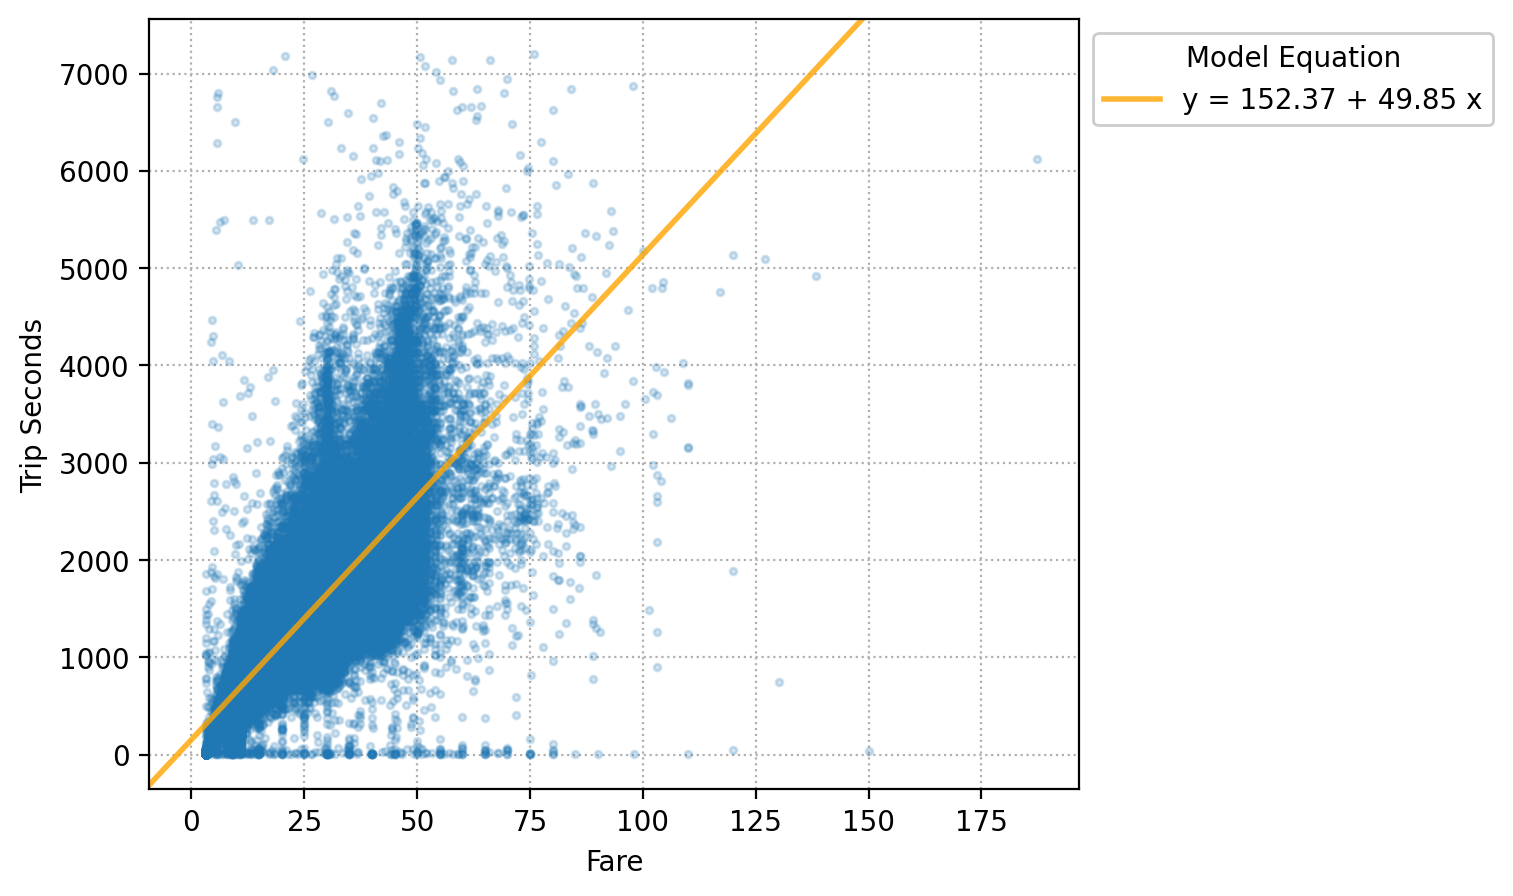

In [24]:
plt.figure(figsize=(6, 5))

plt.plot(df['fare'], df['trip_seconds'], '.', markersize=5, alpha=0.2)
plt.axline((0, model.intercept_), slope=model.coef_[0], linewidth=2, color='orange', alpha=0.8,
           label=f'y = {model.intercept_:.2f} + {model.coef_[0]:.2f} x')
plt.grid(linestyle=':')
plt.xlabel('Fare')
plt.ylabel('Trip Seconds')
plt.legend(framealpha=1, bbox_to_anchor=(1, 1), title='Model Equation')

plt.show()

In [25]:
# Compute mean squared error MSE
import sklearn.metrics

y_pred = model.predict(x) # Fitted / predicted value
mse = np.mean((y - y_pred) ** 2)

(mse, 
 sklearn.metrics.mean_squared_error(y, y_pred)) # https://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error

(262734.0394359199, 262734.0394359199)

In [26]:
# Compute root mean squared error RMSE
(np.sqrt(mse),
 sklearn.metrics.root_mean_squared_error(y, y_pred))

(512.5758865142993, 512.5758865142993)

Coefficient of Determination (R^2) gives the goodness-of-fit
How much % fo variation in y that can be explained by x
1 means perfect fit and 0 is a horizontal line (null model)

In [27]:
# Compute coefficient of determination R^2
ss_reg = np.sum((y_pred - np.mean(y)) ** 2)
ss_error = np.sum((y - y_pred) ** 2)
ss_total = np.sum((y - np.mean(y)) ** 2) # SST = SSR + SSE

ss_reg, ss_error, ss_total

(55639398917.972015, 26273403943.591988, 81912802861.56337)

In [28]:
(np.corrcoef(y, y_pred)[0,1] ** 2, # Corr(y, y_pred)
 ss_reg / ss_total, # SSR / SST
 1 - ss_error / ss_total, # 1 - SSE / SST
 model.score(x, y),
 sklearn.metrics.r2_score(y, y_pred))

(0.6792515574397511,
 0.6792515574397486,
 0.6792515574397409,
 0.6792515574397409,
 0.6792515574397409)

# Step 5b: Multiple linear regression
>**Model:** $(\text{trip seconds}) = 170.00 + 49.76\,(\text{fare}) - 118.31\,(\text{tips percent})$

In [29]:
print(smf.ols(formula='trip_seconds ~ fare + tips_percent', data=df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:           trip_seconds   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                 1.061e+05
Date:                Mon, 07 Oct 2024   Prob (F-statistic):               0.00
Time:                        22:14:33   Log-Likelihood:            -7.6575e+05
No. Observations:              100000   AIC:                         1.532e+06
Df Residuals:                   99997   BIC:                         1.532e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      169.9954      3.034     56.037   

In [30]:
x = sm.add_constant(df[['fare', 'tips_percent']]) # Design matrix with a column of 1's for the intercept term
y = df['trip_seconds']

x.head(2)

const  fare  tips_percent
0    1.0  4.25           0.0
1    1.0  8.50           0.0

In [31]:
print(sm.OLS(y, x).fit().summary())

                            OLS Regression Results                            
Dep. Variable:           trip_seconds   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                 1.061e+05
Date:                Mon, 07 Oct 2024   Prob (F-statistic):               0.00
Time:                        22:14:33   Log-Likelihood:            -7.6575e+05
No. Observations:              100000   AIC:                         1.532e+06
Df Residuals:                   99997   BIC:                         1.532e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          169.9954      3.034     56.037   

In [32]:
x = df[['fare', 'tips_percent']]
y = df['trip_seconds']
model = sklearn.linear_model.LinearRegression(fit_intercept=True).fit(x, y)

model.intercept_, model.coef_, model.score(x, y) # R^2

(169.9954024670086, array([  49.76145196, -118.30515646]), 0.6797960584655361)

# Step 6a: [Multicollinearity](https://en.wikipedia.org/wiki/Multicollinearity) of explanatory variables
>**Model:** $(\text{trip seconds}) = 152.37 + 49.85\,(\text{fare})$

In [33]:
print(smf.ols(formula='trip_seconds ~ fare', data=df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:           trip_seconds   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                 2.118e+05
Date:                Mon, 07 Oct 2024   Prob (F-statistic):               0.00
Time:                        22:14:33   Log-Likelihood:            -7.6584e+05
No. Observations:              100000   AIC:                         1.532e+06
Df Residuals:                   99998   BIC:                         1.532e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.3703      2.718     56.056      0.0

In [34]:
df2 = df[['trip_seconds', 'fare']].copy()
df2['fare_2'] = df2['fare'] * 2

df2.head(2)

trip_seconds  fare  fare_2
0           151  4.25     8.5
1           918  8.50    17.0

In [35]:
np.corrcoef(df2['fare'], df2['fare_2'])[0,1] # Corr(fare, 2 * fare) = 1

0.9999999999999999

>**Model:** $(\text{trip seconds}) = 152.37 + 
\beta_1\,(\text{fare}) + \beta_2\,(\text{fare} \times2)$

In [36]:
print(smf.ols(formula='trip_seconds ~ fare + fare_2', data=df2).fit().summary()) # Parameter estimation is very sensitive and non-unique

                            OLS Regression Results                            
Dep. Variable:           trip_seconds   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                 1.059e+05
Date:                Mon, 07 Oct 2024   Prob (F-statistic):               0.00
Time:                        22:14:33   Log-Likelihood:            -7.6584e+05
No. Observations:              100000   AIC:                         1.532e+06
Df Residuals:                   99997   BIC:                         1.532e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.3703      2.718     56.056      0.0

In [37]:
# Fare and trip miles are highly correlated
np.corrcoef(df['fare'], df['trip_miles'])[0,1]

0.9031626773336406

>**Model:** $(\text{trip seconds}) = 520.45 + 103.91 (\text{trip miles})$

In [38]:
print(smf.ols(formula='trip_seconds ~ trip_miles', data=df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:           trip_seconds   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                 1.153e+05
Date:                Mon, 07 Oct 2024   Prob (F-statistic):               0.00
Time:                        22:14:33   Log-Likelihood:            -7.8434e+05
No. Observations:              100000   AIC:                         1.569e+06
Df Residuals:                   99998   BIC:                         1.569e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    520.4517      2.704    192.486      0.0

>**Model:** $(\text{trip seconds}) = 136.71 + 53.55 (\text{fare}) - 9.61 (\text{trip miles})$

In [39]:
print(smf.ols(formula='trip_seconds ~ fare + trip_miles', data=df).fit().summary()) # Poor model explainability

                            OLS Regression Results                            
Dep. Variable:           trip_seconds   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                 1.063e+05
Date:                Mon, 07 Oct 2024   Prob (F-statistic):               0.00
Time:                        22:14:33   Log-Likelihood:            -7.6571e+05
No. Observations:              100000   AIC:                         1.531e+06
Df Residuals:                   99997   BIC:                         1.531e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    136.7063      2.881     47.458      0.0

# Step 6b: [Variance inflation factor](https://en.wikipedia.org/wiki/Variance_inflation_factor) VIF

In [40]:
numerical_x_cols = list(set(numerical_cols) - {'trip_seconds'}) # Omit y

r2 = {}
for col in numerical_x_cols:
    x = df[numerical_x_cols].drop(col, axis='columns')
    y = df[col]
    model = sklearn.linear_model.LinearRegression(fit_intercept=True).fit(x, y)
    r2[col] = model.score(x, y) # R^2

pd.DataFrame.from_dict(r2, orient='index').rename(columns={0: 'r2'}).eval('vif = 1 / (1 - r2)')

r2          vif
extras        0.971570    35.174672
tips          0.991980   124.692212
tips_percent  0.546423     2.204698
trip_miles    0.820697     5.577154
tolls         0.052419     1.055319
fare          0.999512  2049.046456
trip_total    0.999677  3092.085515

In [41]:
import statsmodels.stats.outliers_influence

df2 = sm.add_constant(df[numerical_x_cols])

vif = {}
for i, col in enumerate(numerical_x_cols, 1):
    vif[col] = statsmodels.stats.outliers_influence.variance_inflation_factor(df2, i)

pd.DataFrame.from_dict(vif, orient='index').rename(columns={0: 'vif'})

vif
extras          35.174672
tips           124.692212
tips_percent     2.204698
trip_miles       5.577154
tolls            1.055319
fare          2049.046456
trip_total    3092.085515